# Load libraries

In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import networkx as nx
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import TweedieRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load data

In [2]:
blue=pd.read_csv('fad_blue_rnadata.csv').rename(columns={"Unnamed: 0": "Cells"})
blue.set_index("Cells", drop=True,inplace=True)
blue=blue.T
x=blue.drop(['BlueFP'],axis=1)
genes=x.columns
#^transpose because we want genes to be features

In [3]:
idx=blue.index
y=blue['BlueFP']
x1=np.load('data/X_pca.npy')

# Use poisson distribution, find best alpha

Simple way of testing best alpha

In [4]:
alpha_vals=[0,1,2,3,4]
powers=[0,1,1.1,1.9]
scores=0
MSEs=999999999999999
for n in alpha_vals:
    for p in powers:
        #split into train and test
        X_train2, X_test2, y_train, y_test = train_test_split(x1, y, test_size=0.2)
        scaler = preprocessing.StandardScaler().fit(X_train2)
        #scale using x_train model for both train & test
        X_train = scaler.transform(X_train2) 
        X_test= scaler.transform(X_test2) 
        reg = TweedieRegressor(power=p, link='log',alpha=n,max_iter=1000)   
        reg.fit(X_train,y_train)
        scoretemp=reg.score(X_test,y_test) 
        y_pred=reg.predict(X_test)
        MSE_temp=np.sqrt(mean_squared_error(y_test,y_pred))#actually RMSE
        print('alpha value: '+str(n))
        print('Score: '+str(scoretemp))
        print('RMSE: '+str(MSE_temp))
        print('power: '+str(p))
        print()
        if MSEs>MSE_temp:
            MSEs=MSE_temp
            scores=scoretemp
            best_a=n
            best_params=reg.get_params()
            best_p=p
print('Best: ')
print('Score (D^2): '+str(scores)) 
print('Root mean squared error: '+str(MSEs)) 
print('Alpha: '+str(best_a)) 
print('Power: '+str(best_p)) 

alpha value: 0
Score: -11.106167750931686
RMSE: 20.31872567544945
power: 0

alpha value: 0
Score: -0.03742042101750953
RMSE: 21.53958009258509
power: 1

alpha value: 0
Score: 0.31275653234940015
RMSE: 6.874867035193399
power: 1.1

alpha value: 0
Score: 0.17185283066453494
RMSE: 7.260076950910764
power: 1.9

alpha value: 1
Score: 0.1589163190897911
RMSE: 7.20735009387469
power: 0

alpha value: 1
Score: 0.34609031175835325
RMSE: 6.237116051195247
power: 1

alpha value: 1
Score: 0.2693944661204032
RMSE: 4.905190604421694
power: 1.1

alpha value: 1
Score: 0.16675724654831636
RMSE: 6.148164041709083
power: 1.9

alpha value: 2
Score: 0.2000952512599129
RMSE: 5.901491757533697
power: 0

alpha value: 2
Score: 0.25801410369977373
RMSE: 6.436069566173582
power: 1

alpha value: 2
Score: 0.19253529527037205
RMSE: 5.241390176534674
power: 1.1

alpha value: 2
Score: 0.08614830176330412
RMSE: 5.096278670023861
power: 1.9

alpha value: 3
Score: 0.2207040696316076
RMSE: 6.003706999927092
power: 0

alph

In [5]:
best_params

{'alpha': 1,
 'fit_intercept': True,
 'link': 'log',
 'max_iter': 1000,
 'power': 1.1,
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

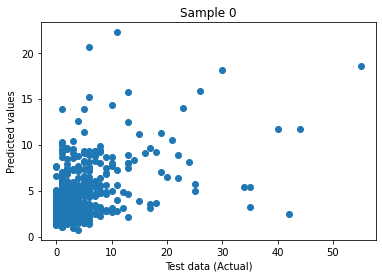

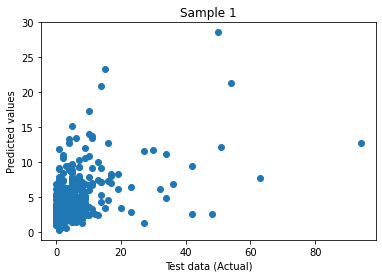

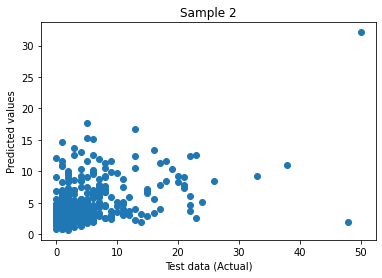

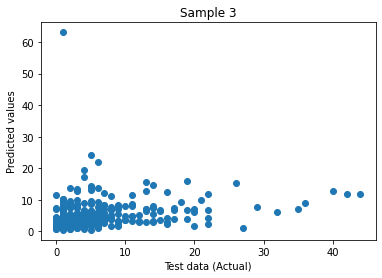

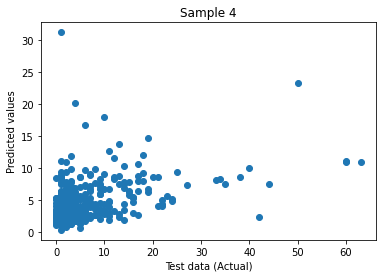

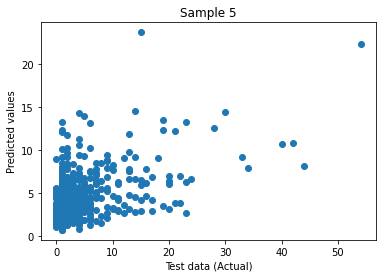

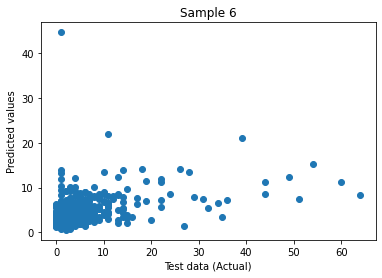

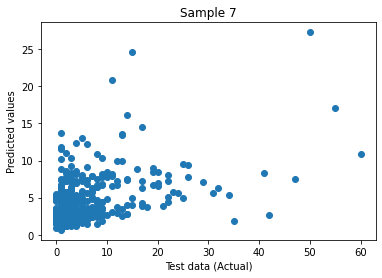

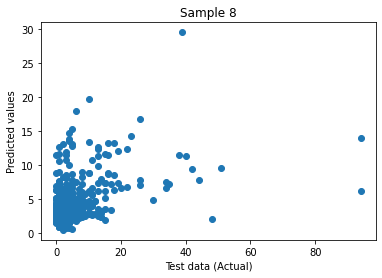

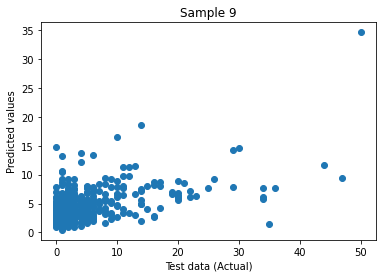

Average score (D^2): 
0.29166773897129217
Average root mean squared error: 
5.744655181270733


In [6]:
numruns=10
scores=0
MSEs=0
for n in range(numruns):
    #split into train and test
    X_train2, X_test2, y_train, y_test = train_test_split(x1, y, test_size=0.2)
    scaler = preprocessing.StandardScaler().fit(X_train2)
    #scale using x_train model for both train & test
    X_train = scaler.transform(X_train2) 
    X_test= scaler.transform(X_test2) 
    reg = TweedieRegressor(power=best_p, link='log',alpha=best_a,max_iter=1000)  
    reg.fit(X_train,y_train)
    scoretemp=reg.score(X_test,y_test)
    scores+=scoretemp
    y_pred=reg.predict(X_test)
    MSEs+=np.sqrt(mean_squared_error(y_test,y_pred))#actually RMSE
    plt.scatter(y_test,y_pred)
    plt.xlabel('Test data (Actual)')
    plt.ylabel('Predicted values')
    plt.title('Sample '+str(n))
    plt.show()
print('Average score (D^2): ')
print(scores/numruns)
print('Average root mean squared error: ')
print(MSEs/numruns)

In [7]:
coefs=reg.coef_
most_imp=np.where(np.absolute(coefs) > .1)[0]
most_imp

array([ 0,  1,  3,  5,  9, 11, 29], dtype=int64)

In [8]:
comp_scores=pd.read_csv('data/princ_gene_components').drop(['Unnamed: 0'],axis=1) 

In [9]:
yep2={}
for n in most_imp:
    row1=comp_scores.loc[[n]]
    h=row1.to_numpy()
    maxs=np.where(np.absolute(h)> .03)[1] 
    maxs2=genes[maxs] 
    yep2[n]=maxs2 

In [10]:
for n in most_imp:
    print(len(yep2[n]))

83
74
69
108
101
99
109
